<a href="https://colab.research.google.com/github/rajivsresearch/Corona/blob/master/Compare_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import pandas as pd
import numpy as np
import requests

import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data from this website will be used for Covid 19 Cases

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df = pd.read_csv(url)

In [3]:
df.head(1)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,51526,51526,51526,53011,53105,53105,53207,53332,53400,53489,53538,53584,53584,53775,53831,53938,53984,54062,54141,54278,54403,54483,54559,54595,54672,54750,54854,54891,54939,55008,55023,55059,55121,55174,55231,55265,55330,55335,55359,55384


In [13]:
df1 = pd.concat([df.iloc[:,0:2], df.loc[:,'1/1/21':]], axis=1)

In [14]:
df1.head(1)

,Province/State,Country/Region,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21
0,NaN,Afghanistan,51526,51526,51526,53011,53105,53105,53207,53332,53400,53489,53538,53584,53584,53775,53831,53938,53984,54062,54141,54278,54403,54483,54559,54595,54672,54750,54854,54891,54939,55008,55023,55059,55121,55174,55231,55265,55330,55335,55359,55384


In [135]:
url = 'https://www.worldometers.info/world-population/population-by-country/'
html = requests.get(url).content
df_list = pd.read_html(html)
pop = df_list[0]

In [136]:
pop.head()

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1439323776,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,2,India,1380004385,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,3,United States,331002651,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,4,Indonesia,273523615,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,5,Pakistan,220892340,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %


In [141]:
def get_pop(country):
  return pop.loc[pop['Country (or dependency)'] == country,'Population (2020)'].values[0]

In [142]:
get_pop('India')

1380004385

In [143]:
def find_roc(arr, pop):
  roc = np.zeros(len(arr))
  for i in range(1,len(arr)):
    roc[i] = (arr[i] - arr[i-1] )/pop/1000000
    
  return roc[1:]

In [42]:
df1.iloc[0,2:].index[1:]

Index(['1/2/21', '1/3/21', '1/4/21', '1/5/21', '1/6/21', '1/7/21', '1/8/21',
       '1/9/21', '1/10/21', '1/11/21', '1/12/21', '1/13/21', '1/14/21',
       '1/15/21', '1/16/21', '1/17/21', '1/18/21', '1/19/21', '1/20/21',
       '1/21/21', '1/22/21', '1/23/21', '1/24/21', '1/25/21', '1/26/21',
       '1/27/21', '1/28/21', '1/29/21', '1/30/21', '1/31/21', '2/1/21',
       '2/2/21', '2/3/21', '2/4/21', '2/5/21', '2/6/21', '2/7/21', '2/8/21',
       '2/9/21'],
      dtype='object')

In [73]:
def get_plot(country):
  f1 = df1['Country/Region'] == country
  data = df1.loc[f1,'1/2/21':]

  plt.plot(data.columns.values[1:], find_roc(data.values[0]), label=country)
  plt.xticks(rotation=90)
  plt.title('Covid Growth Rates in %')
  plt.legend()

Text(0.5, 1.0, 'Growth in Covid Cases in 2021')

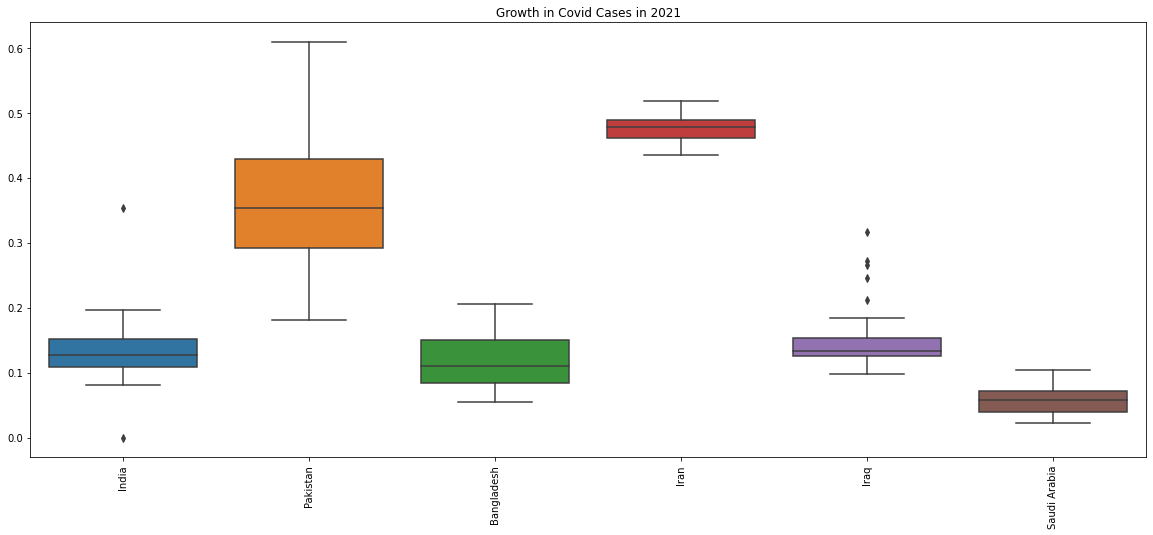

In [125]:
plt.figure(figsize=(20,8))
countries = ['India', 'Pakistan', 'Bangladesh', 'Iran', 'Iraq', 'Saudi Arabia']
data = pd.DataFrame(columns=countries)

for c in countries:
  data.loc[:,c] = find_roc(df1.loc[df1['Country/Region'] == c,'1/2/21':].values[0])

sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title('Growth in Covid Cases in 2021')

Text(0.5, 1.0, 'Growth in Covid Cases in 2021')

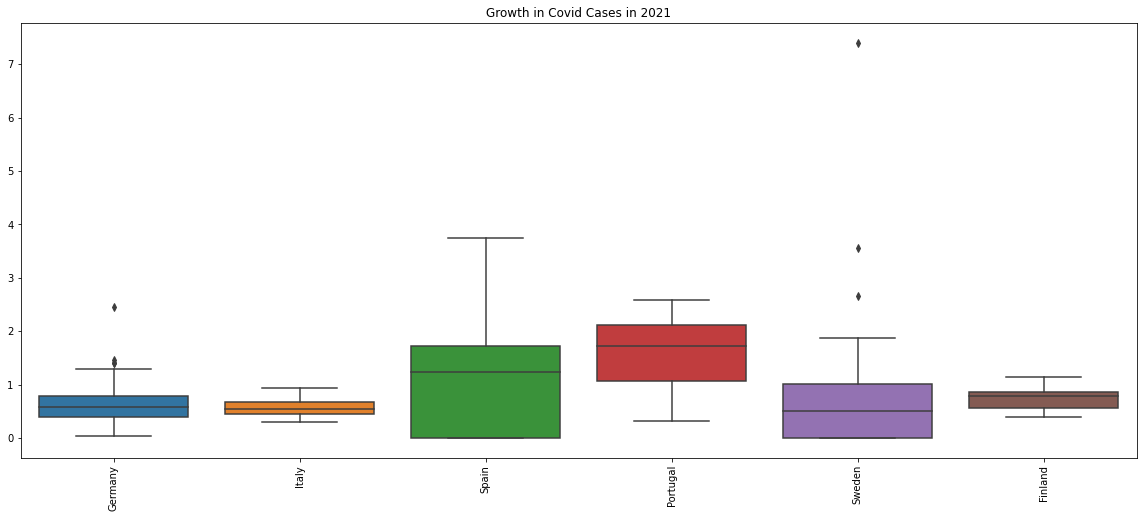

In [127]:
plt.figure(figsize=(20,8))
countries = ['Germany', 'Italy', 'Spain', 'Portugal', 'Sweden', 'Finland']
data = pd.DataFrame(columns=countries)

for c in countries:
  data.loc[:,c] = find_roc(df1.loc[df1['Country/Region'] == c,'1/2/21':].values[0])

sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title('Growth in Covid Cases in 2021')

Text(0.5, 1.0, 'Growth in Covid Cases in 2021')

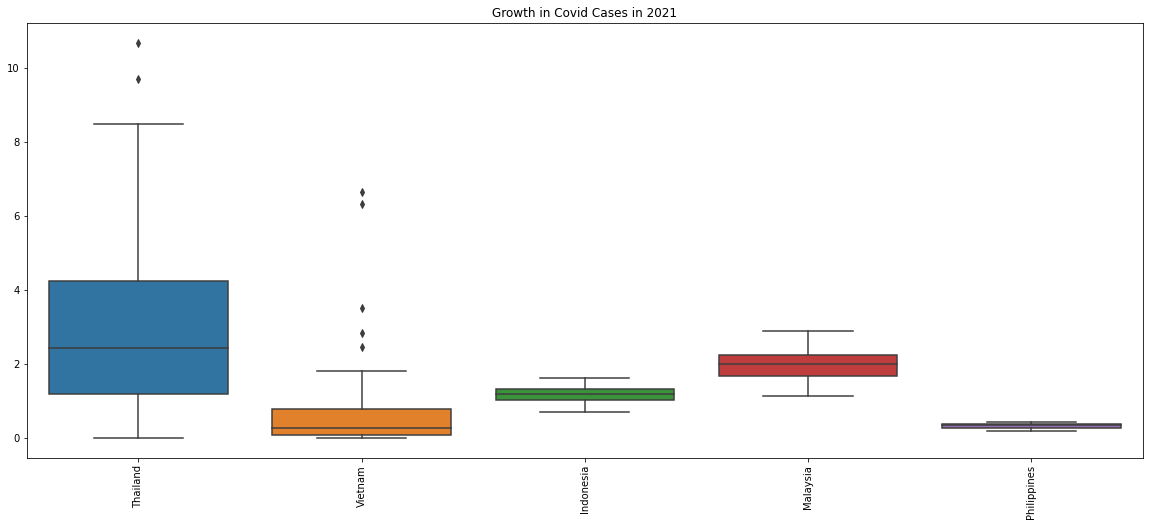

In [126]:
plt.figure(figsize=(20,8))
countries = ['Thailand', 'Vietnam', 'Indonesia', 'Malaysia', 'Philippines']
data = pd.DataFrame(columns=countries)

for c in countries:
  data.loc[:,c] = find_roc(df1.loc[df1['Country/Region'] == c,'1/2/21':].values[0])

sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title('Growth in Covid Cases in 2021')

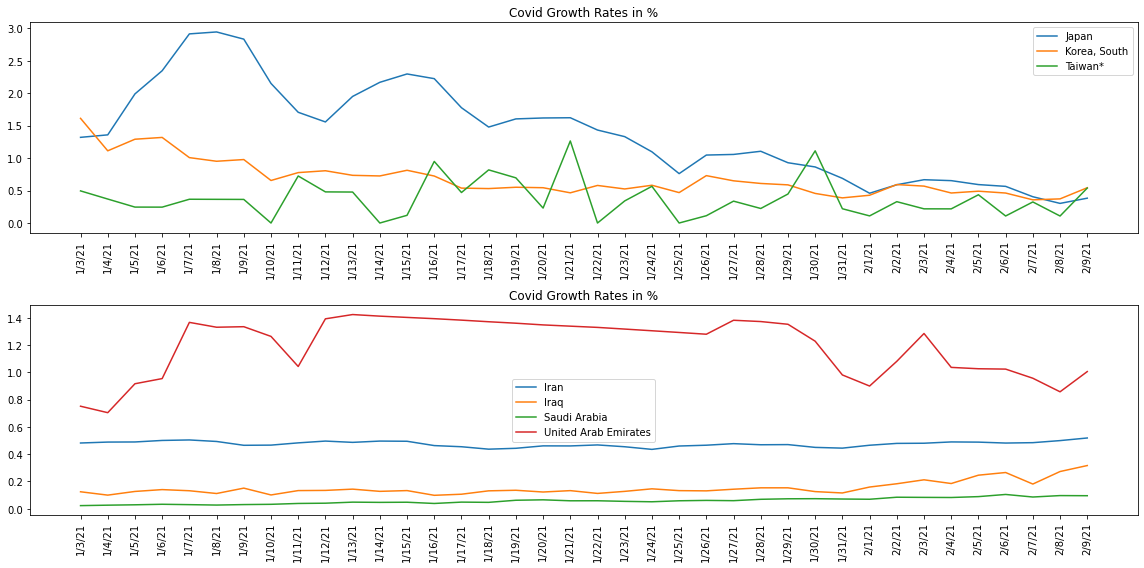

In [84]:
plt.subplots(2,1, figsize=(16,8))

plt.subplot(2,1,1)
get_plot(country = 'Japan')
get_plot(country = 'Korea, South')
get_plot(country = 'Taiwan*')

plt.subplot(2,1,2)
get_plot(country = 'Iran')
get_plot(country = 'Iraq')
get_plot(country = 'Saudi Arabia')
get_plot(country = 'United Arab Emirates')

plt.tight_layout()

In [77]:
df1['Country/Region'].values

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Australia', 'Australia', 'Australia', 'Australia', 'Australia',
       'Australia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada',
       'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada',
       'Canada', 'Canada', 'Canada', 'Central African Republic', 'Chad',
       'Chile', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'Chi